In [43]:
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid", palette="pastel", color_codes=True)

load_dotenv()
os.chdir(os.getenv("ROOT_DIR"))

In [40]:
# --- PARAMS --- #
train_data_path = os.getenv("DF_TRAIN_PATH")
test_data_path = os.getenv("DF_NEW_DATA_PATH")

print(train_data_path)
print(test_data_path)

data/raw/train.csv
data/raw/test.csv


In [41]:
# --- LOAD DATA --- #
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
# Project
### 1. Check consistency
### 2. Check distribution
### 2.1. Histogram
### 3. Check correlation with target
### 3.1. Histogram
### 3.2. Boxplot
### 3.3. Violinplot
### 3.4. Swarmplot
### 3.5. T-test
### 3.6. Logit model
### 4. Multivariate analysis (graphical)
### 4.1. Histogram
### 4.2. Boxplot
### 4.3. Violinplot
### 4.4. Swarmplot
### 5. Imputation to Age
### 5.1. Imputation by mean
### 5.2. Imputation by knn
### 6. Multivariate analysis (statistical)
### 6.1. Logit model

### Check consistency

In [12]:
# --- CHECK CONSISTENCY --- #
train_data['Age'].isna().sum()

# INSIGHT-1: 177 missing values in Age column

np.int64(177)

### Check distribution

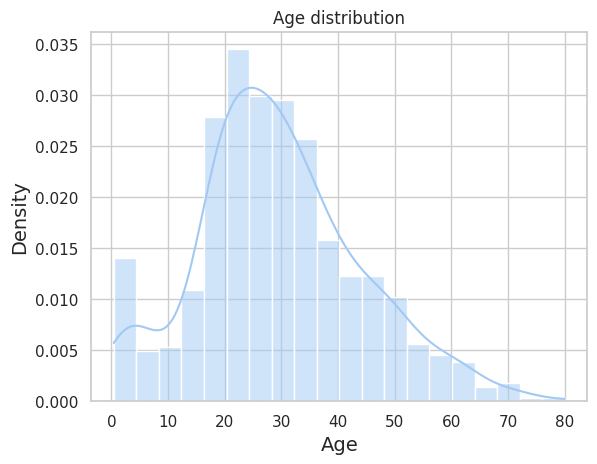

In [39]:
## --- CHECK DISTRIBUTION --- #
sns.histplot(
    data=train_data,
    x='Age',
    kde=True,
    stat='density',
    common_norm=False
)

plt.title("Age distribution")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

# Right skewed Age distribution. 
# Most part of the passengers have between 20 anf 40 years old.

### Check correlation with target

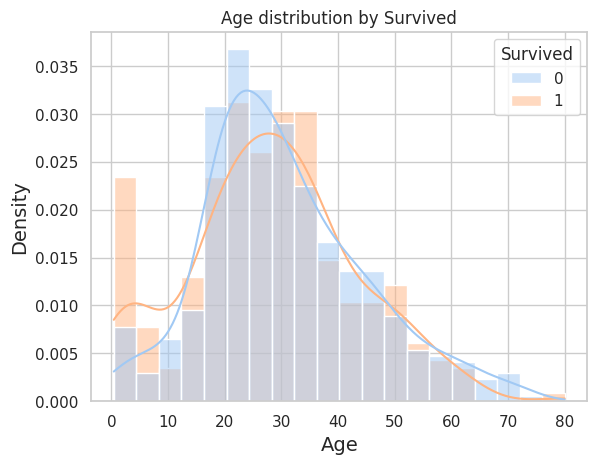

In [56]:
# --- CHECK CORRELATION WITH TARGET --- #

# Age distribution by Survived (histogram)
sns.set(style='whitegrid', palette='pastel', color_codes=True)

sns.histplot(
    data=train_data,
    x='Age',
    hue='Survived',
    kde=True,
    stat='density',
    common_norm=False
)

plt.title('Age distribution by Survived')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# INSIGHT-2: Both distributions are similar, except for the children.
# The children have a higher survival rate.

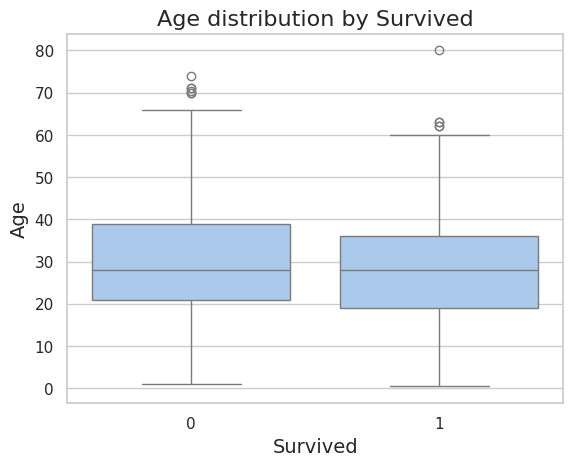

In [57]:
# Age distribution by Survived (boxplot)
sns.boxplot(
    data=train_data,
    x='Survived',
    y='Age'
)

plt.title('Age distribution by Survived', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

# not relevant.

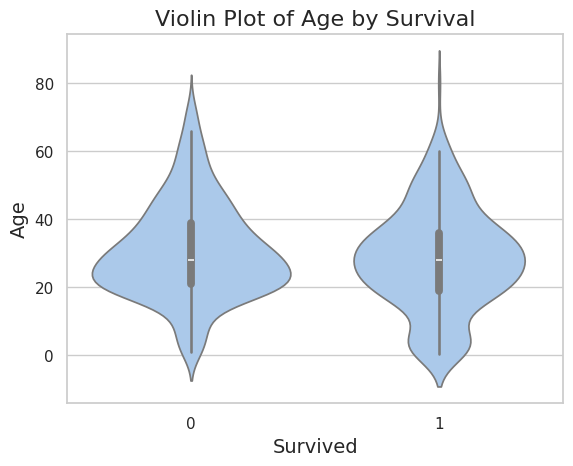

In [58]:
# Age distribution by Survived (violin plot)
sns.violinplot(
    data=train_data,
    x='Survived',
    y='Age'
)

plt.title('Violin Plot of Age by Survival', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

# not relevant.

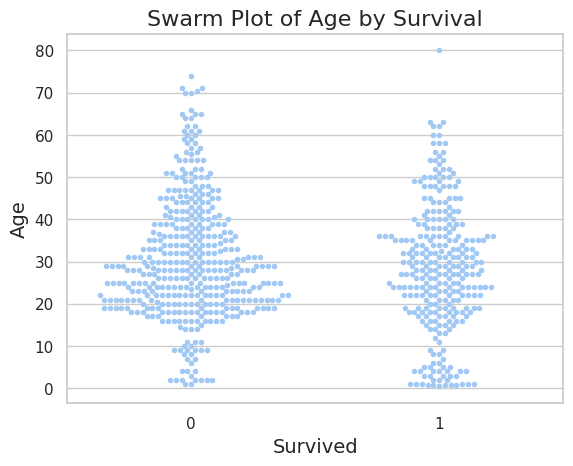

In [59]:
# Age distribution by Survived (swarm plot)
sns.swarmplot(
    data=train_data,
    x='Survived',
    y='Age',
    size=4
)

plt.title('Swarm Plot of Age by Survival', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

# not relevant.

In [ ]:
# T-test
from scipy.stats import ttest_ind

group_survived = train_data[train_data['Survived'] == 1]['Age'].dropna()
group_died = train_data[train_data['Survived'] == 0]['Age'].dropna()

t_stat, p_value = ttest_ind(group_survived, group_died, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# p-value < 0.05, we reject the null hyphotesis that means are equal.
# INSIGHT-3: In this case, we can say that the mean age of the survivors is 
# different from the mean age of the deceased. 

In [60]:
# Logit model
import statsmodels.api as sm

# prep
tmp = train_data[['Survived', 'Age']].dropna()
x = tmp['Age']
x = sm.add_constant(x)
y = tmp['Survived']

# fit
logit_model = sm.Logit(y, x).fit()
print(logit_model.summary())

# It reinforces the previous insight that the Age variable is significant for the mdel.
# (p-value < 0.05, |LL-null| > |Log-Likelihood|, LLR p-value < 0.05)

Optimization terminated successfully.
         Current function value: 0.672429
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                0.004445
Time:                        06:27:31   Log-Likelihood:                -480.11
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                   0.03839
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0567      0.174     -0.327      0.744      -0.397       0.283
Age           -0.0110      0.

### Multivariate analysis (graphical)

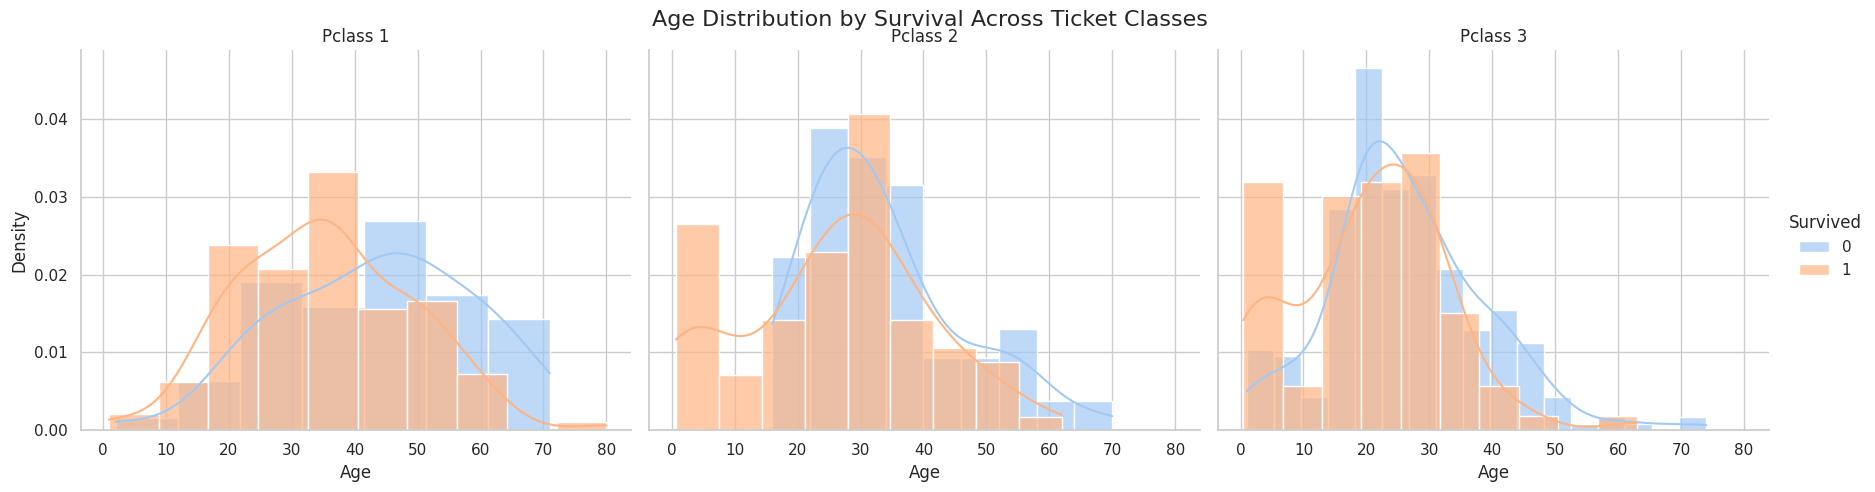

In [46]:
# FacetGrid Age distribution by Survived across Ticket Classes
g = sns.FacetGrid(train_data, col="Pclass", hue="Survived", height=5, aspect=1.2)
g.map(sns.histplot, "Age", kde=True, stat="density", common_norm=False, alpha=0.7)
g.add_legend()
g.set_axis_labels("Age", "Density")
g.set_titles("Pclass {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Survival Across Ticket Classes', fontsize=16)
plt.show()

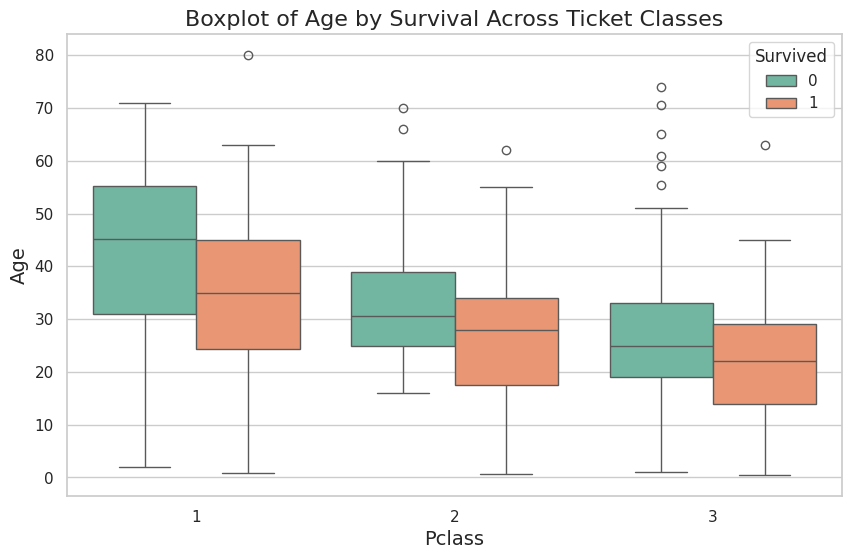

In [49]:
# Boxplot of Age by Survived and Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x="Pclass", y="Age", hue="Survived", data=train_data, palette="Set2")
plt.title('Boxplot of Age by Survival Across Ticket Classes', fontsize=16)
plt.xlabel('Pclass', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

# INSIGHT-4: there is a sistematic relationship between Age and Pclass.
# The older the passenger, the higher the ticket class (in mean value).

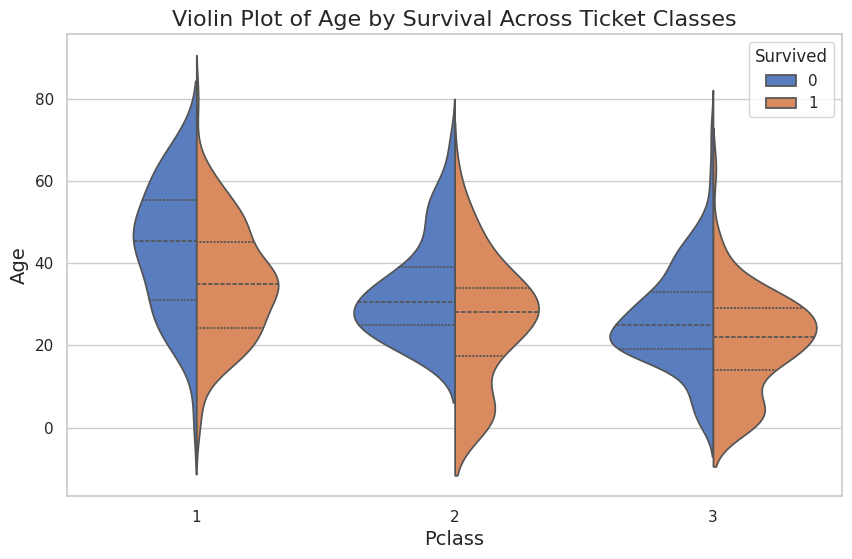

In [52]:
# Violin Plot of Age by Survived and Pclass
plt.figure(figsize=(10, 6))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_data, split=True, inner="quartile", palette="muted")
plt.title('Violin Plot of Age by Survival Across Ticket Classes', fontsize=16)
plt.xlabel('Pclass', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

# not relevant.

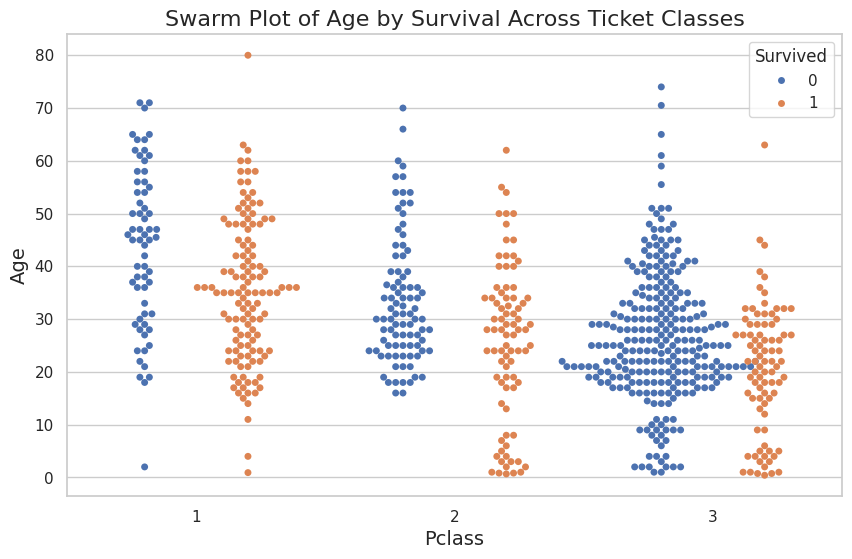

In [54]:
# Swarmplot of Age by Survived and Pclass
plt.figure(figsize=(10, 6))
sns.swarmplot(x="Pclass", y="Age", hue="Survived", data=train_data, dodge=True, palette="deep", size=5)
plt.title('Swarm Plot of Age by Survival Across Ticket Classes', fontsize=16)
plt.xlabel('Pclass', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

# not relevant.

### Imputation to Age

In [62]:
# Imputation by mean
from sklearn.impute import SimpleImputer

imputer_age_mean = SimpleImputer(strategy='mean')
imputer_age_mean.fit(train_data['Age'].values.reshape(-1, 1))

train_data['Age2'] = imputer_age_mean.transform(train_data['Age'].values.reshape(-1, 1))

# Imputation by knn
from sklearn.impute import KNNImputer

imputer_age_knn = KNNImputer(n_neighbors=5)
imputer_age_knn.fit(train_data['Age'].values.reshape(-1, 1))

train_data['Age3'] = imputer_age_knn.transform(train_data['Age'].values.reshape(-1, 1))

In [63]:
# Evaluate the imputation (Baseline)
import statsmodels.api as sm

# prep
tmp = train_data[['Survived', 'Age']].dropna()
x = tmp['Age']
x = sm.add_constant(x)
y = tmp['Survived']

# fit
logit_model = sm.Logit(y, x).fit()
print(logit_model.summary())

# It reinforces the previous insight that the Age variable is significant for the mdel.
# (p-value < 0.05, |LL-null| > |Log-Likelihood|, LLR p-value < 0.05)

Optimization terminated successfully.
         Current function value: 0.672429
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                0.004445
Time:                        06:31:45   Log-Likelihood:                -480.11
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                   0.03839
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0567      0.174     -0.327      0.744      -0.397       0.283
Age           -0.0110      0.

In [64]:
tmp = train_data[['Survived', 'Age2']].dropna()
x = tmp['Age2']
x = sm.add_constant(x)
y = tmp['Survived']

logit_model = sm.Logit(y, x).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.663456
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                0.003688
Time:                        06:31:53   Log-Likelihood:                -591.14
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                   0.03643
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1433      0.172     -0.832      0.405      -0.481       0.194
Age2          -0.0112      0.

In [65]:
tmp = train_data[['Survived', 'Age3']].dropna()
x = tmp['Age3']	
x = sm.add_constant(x)
y = tmp['Survived']

logit_model = sm.Logit(y, x).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.663456
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                0.003688
Time:                        06:31:57   Log-Likelihood:                -591.14
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                   0.03643
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1433      0.172     -0.832      0.405      -0.481       0.194
Age3          -0.0112      0.

In [28]:
(train_data['Age2'] == train_data['Age3']).all()

# INSIGHT-5: Both imputation methods give the same results, but the imputation makes a difference with resspect to the baseline model.

np.True_

### Multivariate Analysis

In [38]:
tmp = train_data[['Survived', 'Age2', 'Pclass', 'Sex']].dropna()
tmp.Sex = tmp.Sex.map({'male': 1, 'female': 0})

x = tmp[['Age2', 'Pclass', 'Sex']]
x = sm.add_constant(x)
y = tmp['Survived']

logit_model = sm.Logit(y, x).fit()
print(logit_model.summary())

# INSIGHT-6: All the variables are significant for the model.
# Age is relevant for the model, but it is not the only one.

Optimization terminated successfully.
         Current function value: 0.451923
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                  0.3213
Time:                        06:04:51   Log-Likelihood:                -402.66
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.450e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7320      0.450     10.520      0.000       3.850       5.614
Age2          -0.0334      0.

### Results

1. INSIGHT-1: 177 missing values in Age column.

2. INSIGHT-2: Both distributions are similar, except for the children.The children have a higher survival rate.

3. INSIGHT-3: In this case, we can say that the mean age of the survivors is different from the mean age of the deceased. 

4. INSIGHT-4: there is a sistematic relationship between Age and Pclass. The older the passenger, the higher the ticket class (in mean value).

5. INSIGHT-5: Both imputation methods give the same results, but the imputation makes a difference with resspect to the baseline model.

6. INSIGHT-6: All the variables are significant for the model. Age is relevant for the model, but it is not the only one.

For Age, we have a right skewed distribution, with most part of values between 20 and 40 years. The variable has missing values. Applying imputations methods, we see that the methods proved gave the same results in terms of relationship with target variables. So we select imputation by mean as the method to do it.

In terms of correlation with target, we see that there is differences between surviving rate and Age. The children have a higher survival rate. The mean age is lower for the survival people.

It effect can be a product of the correlation Age-Pclass. However, we see that all variables (Sex, Pclass, Age) as a ensemble are good predictors of Survived.

Then:

1. Incorporate Age to the model.
2. Use as a imputation method Mean-imputation.